# Thermosensitivity

### Table of Contents

* [1. Definition](#def)
* [2. Functions to manipulate thermosensitivity](#2functions)

In this notebook, you will manipulate some temperature timeseries in order to calculate the thermosensitivity and be aware of its effect on energy consumption

In [10]:
import numpy as np
import pandas as pd
import csv
import os
import datetime
import copy
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import linear_model

os.chdir('D:\GIT\Etude_TP_CapaExpPlaning-Python')
from functions.functions_decompose_thermosensibilite import * #Il faut préciser le chemin où vous avez sauvegardé les données csv

## 1. Definition <a class="anchor" id="def"></a>
First, you have to know that we can separate that energy consumption depends on thermosensitivity, especially in winter. Indeed, for temperatures below 15°C, we can see that electricity consumption increases when the temperature decreases (I invite you to read [my post](https://www.energy-alternatives.eu/2019/05/24/variabilite-de-la-consommation-electrique-et-thermo-sensibilite.html) on the subject for a better understanding).

We can see this dependance with the code below where we plot the load factor in function of the temperature.

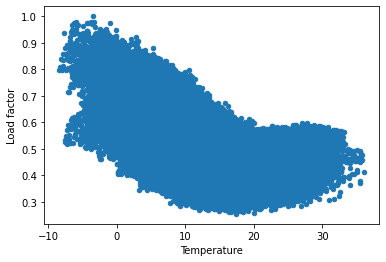

In [11]:
ConsoTemp=pd.read_csv('CSV/input/ConsumptionTemperature_1996TO2019_FR.csv')
del ConsoTemp['Date']
ConsoTemp=ConsoTemp.sort_values(by = 'Temperature')
ConsoTemp.set_index('Temperature', inplace=True)
maxconso=ConsoTemp.max()[0]
ConsoTemp['Consumption']=ConsoTemp['Consumption']/maxconso
ConsoTemp.columns=['Load factor']
graph=ConsoTemp.reset_index().plot.scatter(x='Temperature', y='Load factor')
plt.show(graph) 

## 2. Functions to manipulate thermosensitivity <a class="anchor" id="functions"></a>
There is a lot of points but we can see the trend :
- a descending straight line for temperatures below 14°C
- a horizontal straight line for temperatures above 14°C

Consequently, we can separate the consumption into two parts :
- one that does not depend on temperature called no-thermosensitive consumption
- one that depends on temperature called thermosensitive consumption

It's for the hours when temperatures are below 14°C that we have a thermo sensitive AND no-thermosensitive consumption otherwise we only have a no-thermosensitive consumption.

Here is the function to separate these two kinds of consumption and get the hourly thermosensitivity (in MW/°C). Check the file functions_decompose_thermosensibilite.py to understand how the function works.

In [12]:
Decomposeconso(2015) #Let's do that for the year 2015

(                     Conso thermo  Conso Nonthermo  Temperature
 Date                                                           
 2015-01-01 00:00:00  29579.803137     44914.196863    -0.183075
 2015-01-01 01:00:00  32007.907198     39498.092802    -0.470650
 2015-01-01 02:00:00  34371.007670     36762.992330    -0.662975
 2015-01-01 03:00:00  34993.489785     33846.510215    -0.876050
 2015-01-01 04:00:00  34704.050989     31044.949011    -1.096825
 ...                           ...              ...          ...
 2015-12-31 19:00:00  12259.802306     50400.197694     8.417175
 2015-12-31 20:00:00  12248.581051     47781.418949     7.874125
 2015-12-31 21:00:00  12834.838985     43952.161015     7.474075
 2015-12-31 22:00:00  13636.768403     41503.231597     7.100875
 2015-12-31 23:00:00  14556.549260     44961.450740     6.892575
 
 [8759 rows x 3 columns],
                      Thermosensibilite
 Heure de la journee                   
 0                         -2085.570522
 1     

Q.1) Is the thermosensitivity coherent (value for day/night, min/max value) ?

Q.2) Compute the mean of thermosensitivity and compare it to the value you can find in [my post](https://www.energy-alternatives.eu/2019/05/24/variabilite-de-la-consommation-electrique-et-thermo-sensibilite.html).

You can do other interesting things. For example, you can redecompose the electric consumption of the year X to thermosensitive and no-thermosensitive parts from the thermosensitivity of the year X and the temperatures of the year Y. It's very useful to compare the years.

In [13]:
(a,b)=Decomposeconso(2015)
ChangeTemperature(a,b,2017) #Here we use the temperature of the year 2017

,Conso thermo,Conso Nonthermo,Temperature
Date,,,
2015-01-01 00:00:00,31449.099996,44914.196863,-1.079375
2015-01-01 01:00:00,33930.894370,39498.092802,-1.340025
2015-01-01 02:00:00,36134.684289,36762.992330,-1.415375
2015-01-01 03:00:00,36518.804207,33846.510215,-1.524475
2015-01-01 04:00:00,35928.775444,31044.949011,-1.629600
...,...,...,...
2015-12-31 19:00:00,9026.024121,50400.197694,9.889761
2015-12-31 20:00:00,8361.836628,47781.418949,9.818000
2015-12-31 21:00:00,8607.465274,43952.161015,9.623500


Q.3)Compare this table to the previous one and comment the differences

In addition to that you can also redecompose the electric consumption of the year X to thermosensitive and no-thermosensitive parts from a new table of thermosensitivity.

In [14]:
(a,b)=Decomposeconso(2015)
(c,d)=Decomposeconso(2011)
RecomposeTemperature(a,d)

,Conso thermo,Conso Nonthermo,Temperature
Date,,,
2015-01-01 00:00:00,29455.827598,44914.196863,-0.183075
2015-01-01 01:00:00,30573.852422,39498.092802,-0.470650
2015-01-01 02:00:00,34093.650332,36762.992330,-0.662975
2015-01-01 03:00:00,34523.080393,33846.510215,-0.876050
2015-01-01 04:00:00,33807.290653,31044.949011,-1.096825
...,...,...,...
2015-12-31 19:00:00,11492.318661,50400.197694,8.417175
2015-12-31 20:00:00,13122.592854,47781.418949,7.874125
2015-12-31 21:00:00,13721.941059,43952.161015,7.474075


Now, you know everything about thermosensitivity and you can use theses functions whenever you want in the TP to cast light on interesting values and draw smart conclusions :)